# Исследование для интернет-магазина "Стримчик"

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Интернет-магазину Стримчик необходимо получить данные о закономерностях, влияющих на коммерческую успешность игры. На основе данных будут спланированы кампании на 2017 г. Таким образом: 

**Цель исследования**
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**
Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных
 4. Проверка гипотез.

### Общая информация о данных

In [32]:
#импортируем все необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [33]:
data = pd.read_csv('/datasets/games.csv')

In [34]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 всего в массиве 16715 строк. Есть что поправить:
<br> Названия столбцов содержат заглавные буквы
<br> в нескольких столбцах есть пропущенные значения. В столбцах Year_of_Release, Critic_Score, User_Score, Rating пропуски стоит изучить, и при необходимости, заменить или удалить.   
<br> форматы данных столбцов Year_of_Release, User_Score подлежат изменению 

### Подготовка данных

In [36]:
#устраним самый явный недочет - приведем все названия к змеиному регистру

for col in data:
    data = data.rename(
    columns={
        col: col.lower()
    }
)

In [37]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [38]:
#прорверим данные на наличие явных дубликатов:
data.duplicated().sum()

0

In [39]:
#прорверим данные на наличие неявных дубликатов:
print(data['name'].sort_values().unique())
print(data['platform'].sort_values().unique())
data['genre'].sort_values().unique()

pd.set_option('display.max_rows', None)

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [40]:
#дубликатов нет

In [41]:
#так, я попробую:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

#я правильно понимаю, код вывел строки с предполагаемыми дубликатами?

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [42]:
#в столбце user_score есть значения, препятствующие преобразованию данных в численный формат:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [43]:
#как много этих значений?
data['user_score'].value_counts()


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.4      72
5.6      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.3      37
4.6      37
4.5      34
4.1      33
4.4      33
9.3      31
4.2      28
3.8      28
4        27
3.5      26
4.7      24
2.8      24
3.1      23
3.4      23
3        21
3.6      20
3.7      19
3.3      15
3.2      13
3.9      13
2.5      12
9.4      11
2        11
2.4      11
2.9       9
2.1       9
1.7       9
2.7       8
2.2       6
1.8       6
9.5       6
1.4       5
2.6       4
1.2       3
1.6       3
0.6       2
1.3       2
0.3 

In [44]:
#2424 - это существенная потеря данных, нужно заменить.
#tbd - это to be determined = будет определено.То есть никто еще не ставил оценку данной игре. Заменим tbd на 0
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

In [45]:
#аналогично изучим пропуски в 'rating'
data['rating'].unique()


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [46]:
#Из общей информации о данных известно, что доля прорпусков в столбце rating высокая, удалить нельзя. Заменим nan на unknown
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [47]:
#User_Score преобразуем в формат, удобный для обработки данных           
data['user_score'] = data['user_score'].astype('float')

In [48]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [49]:
#оставим данные, где год релиза не пропущен

data_final = data.query('~year_of_release.isnull()', engine='python')
data_final = data_final.reset_index()
data_final['year_of_release'] = data_final['year_of_release'].astype('int')

#посмотрим, много ли данных отфильтровано
data.shape[0]/data_final.shape[0] # 1,6% выглядит небольшой потерей

1.016356560865864

In [50]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   float64
 11  rating           16446 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


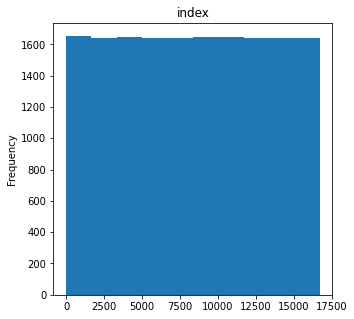

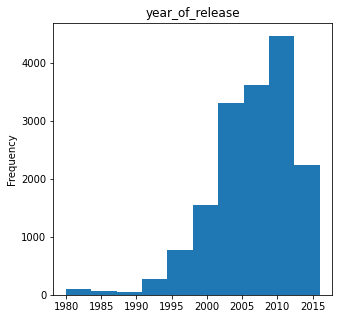

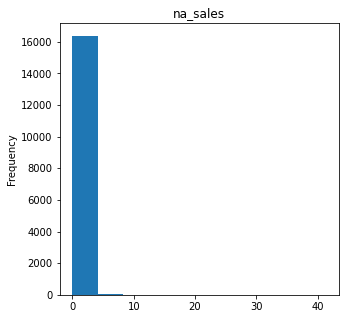

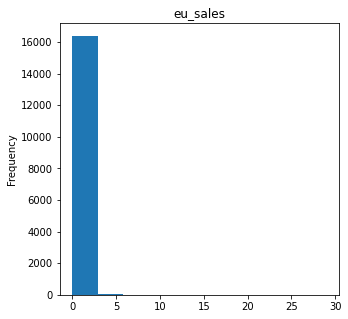

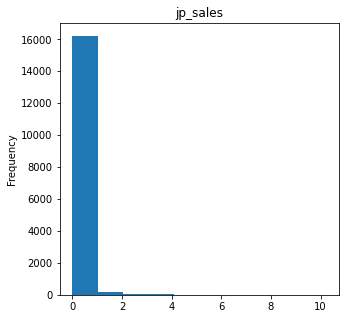

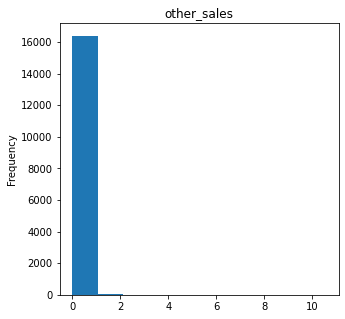

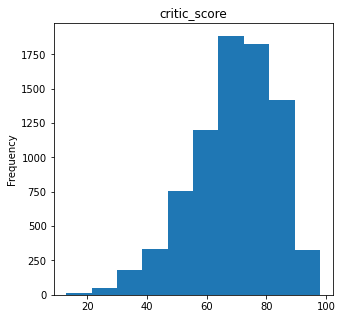

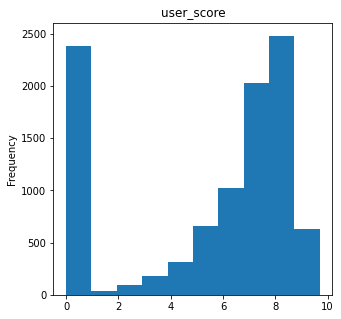

In [51]:
#изучим полученные данные после преобразований:
data_numeric = data_final.select_dtypes(include=np.number)
for col in data_numeric :
    data_numeric [col].plot(title=col, kind ='hist',figsize=(5, 5))
    plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Данные по продажам выглядят так, что бОльшая часть значений лежит около 0. Учитывая, что речь идет о единице "миллион проданных копий", вполне допустимо
<br> График user_score отобразил замененные на 0 отсутствующие оценки пользователей
<br> У диаграммы year_of_release довольно длинный "хвост" в сторону первых лет появления компьютерных игр. Возможно, данные за первые годы стоит отбросить    

In [52]:
#добавим суммарные показатели продаж по всем регионам
data_final['total_sales'] = data_final[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data_final.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Проведена предобработка данных:
<br> - названия столбцов приведены к нижнему регистру
<br> - данные проверены на наличие дубликатов    
<br> - обработаны пропуски в данных
<br> - некорректные для обработки данных форматы изменены
<br> - необходимые для анализа столбцы добавлены
<br> - после предобработки сделана первичная визуализация данных для предварительных выводов и выявления оставшихся недочетов    

### Исследовательский анализ данных

In [53]:
#выведем суммарное количество игр за каждый год
games_per_year = data_final.groupby(['year_of_release']).agg(games=('year_of_release', 'count'))

games_per_year.head()

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


[Text(0.5, 0, 'year'), Text(0, 0.5, 'games count')]

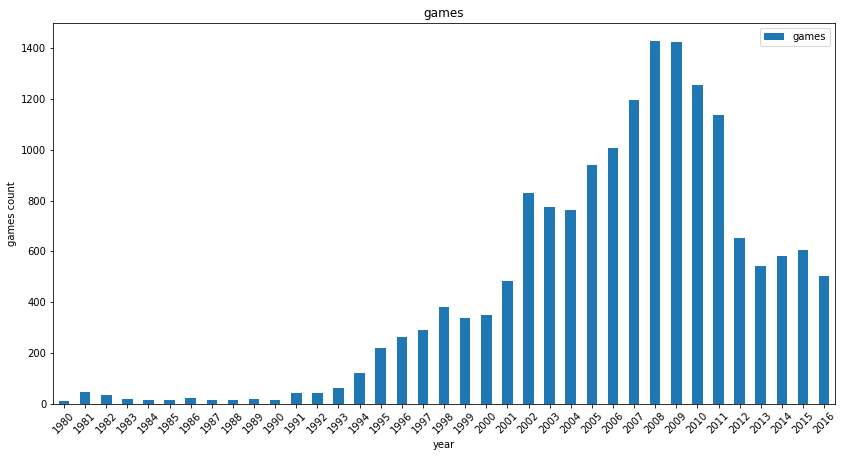

In [54]:
#выглядит так, что в таблице есть данные, которые можно отбросить. Построим гистограмму
dx = games_per_year.plot.bar(title='games', rot=45, figsize=(14,7))

dx.set(xlabel='year', ylabel='games count')

In [55]:
#оставим данные с 1991 г и проверим % потери
data_final = data_final[data_final['year_of_release'] >= 1991]

data.shape[0]/data_final.shape[0] #3% в пределах допустимого

1.03020030816641

[Text(0.5, 0, 'year'), Text(0, 0.5, 'games count')]

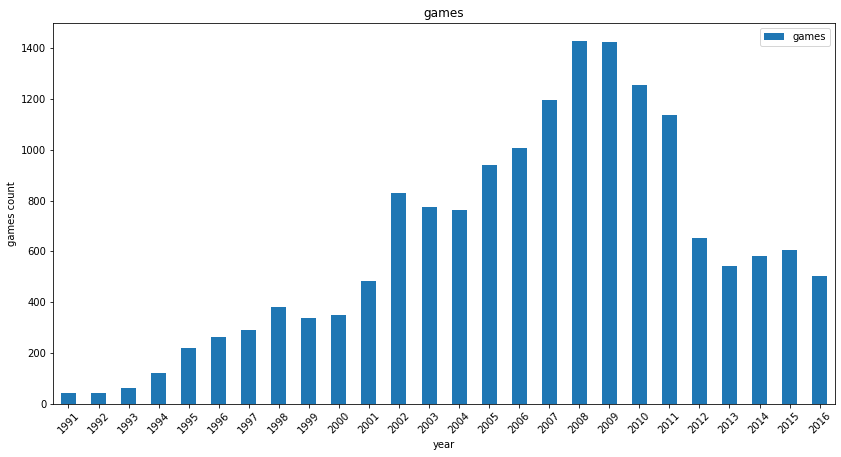

In [56]:
#проверим результат:
games_per_year = data_final.groupby(['year_of_release']).agg(games=('year_of_release', 'count'))
dx = games_per_year.plot.bar(title='games', rot=45, figsize=(14,7))

dx.set(xlabel='year', ylabel='games count')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 В данных задействован достаточно большой период времени:
<br> от момента появления компьютерных игр, их становления, до периода бурного роста и условно настоящего времени.
<br> Для целей исследования данные первых лет не представляют интереса, пока ограничим данные с 1991 - года существенного роста.

<AxesSubplot:title={'center':'data_platform'}, xlabel='platform'>

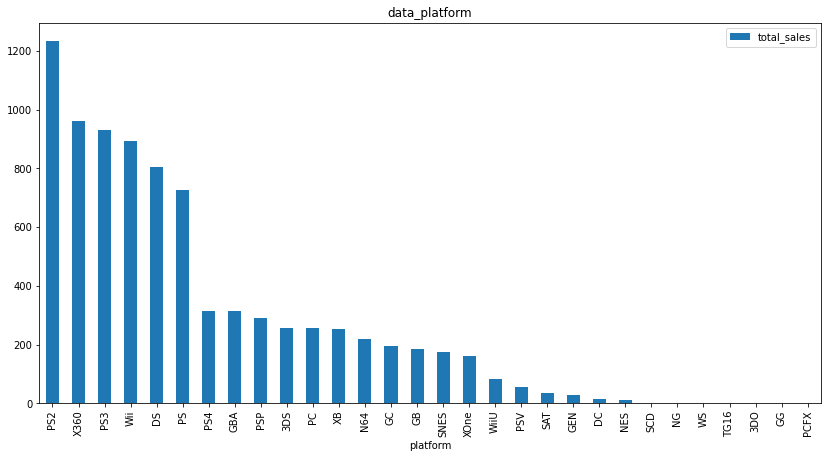

In [57]:
#рассмотрим продажи в разрезе платформ:
data_platform_pivot = data_final.pivot_table(index='platform',values='total_sales',aggfunc='sum')\
.sort_values(by='total_sales',ascending=False)

data_platform_pivot.plot(title='data_platform', kind ='bar',figsize=(14,7))

In [58]:
data_final['platform'].sort_values().unique() #для копирования названий

array(['3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'], dtype=object)

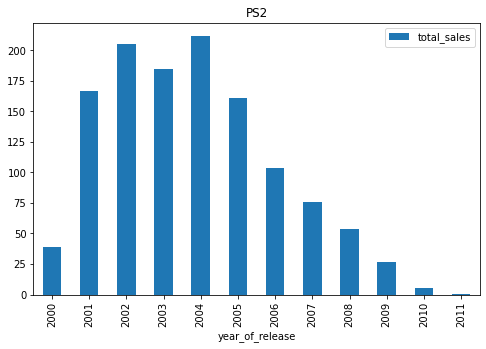

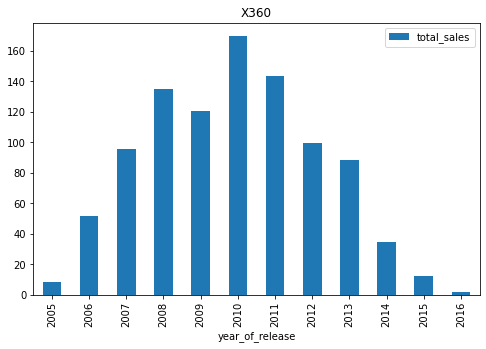

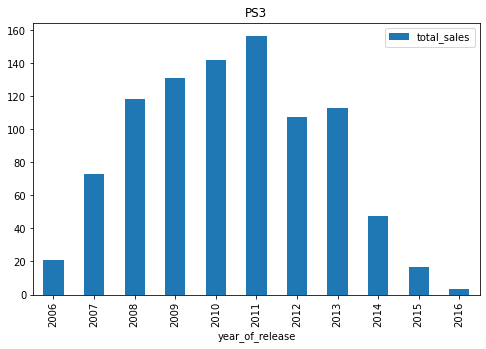

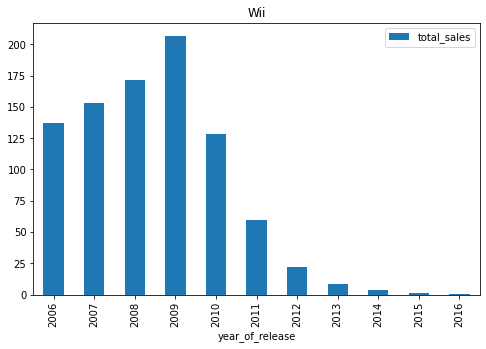

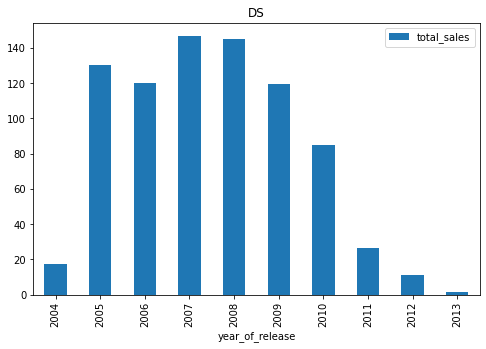

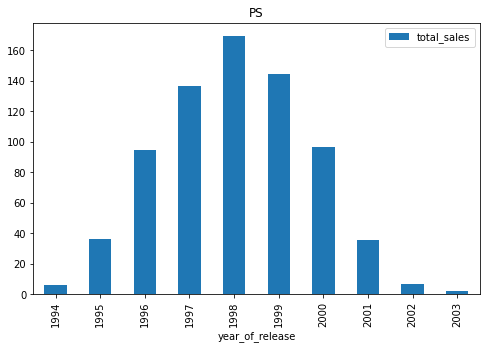

In [59]:
#построим распределение по годам для наиболее популярных платформ:
plts = ['PS2','X360', 'PS3','Wii','DS','PS']
for el in plts:
    data_final.query('platform == @el').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(title = el, kind ='bar',figsize=(8,5))
    plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 По данным 6 наиболее популярных платформ можно заметить, что есть некий жизненный цикл
<br> Характерный период исчезновения старых и появления новых составляет около 10 лет.
<br> Также на графиках видно, что пиковый период продаж составляет примерно 5 лет.
<br> Далее изучим данные за актуальный период - последние 5 лет: 2011-2016 гг    

<AxesSubplot:title={'center':'platform'}, xlabel='platform'>

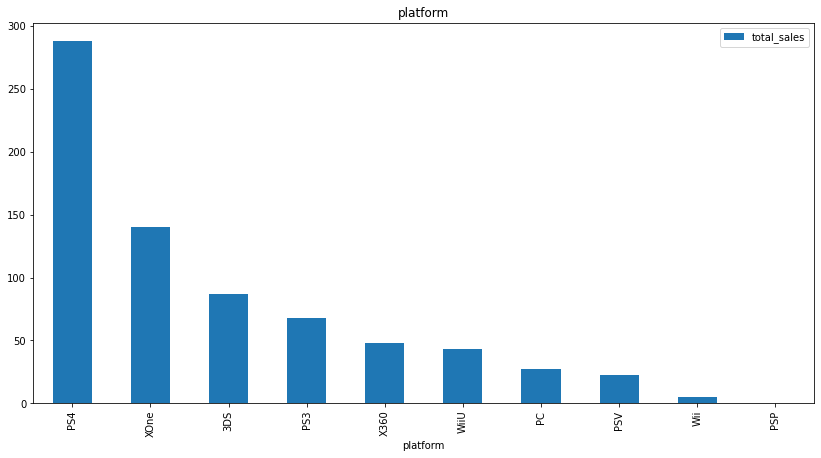

In [60]:
#Возьмем данные за последние 3 года:
data_final = data_final[data_final['year_of_release'] >= 2014]
data_final_pivot = data_final.pivot_table(index='platform',values='total_sales',aggfunc='sum')\
.sort_values(by='total_sales',ascending=False)

data_final_pivot.plot(title='platform', kind ='bar',figsize=(14,7))

[Text(0, 0, 'PS4'),
 Text(1, 0, '3DS'),
 Text(2, 0, 'XOne'),
 Text(3, 0, 'WiiU'),
 Text(4, 0, 'PS3'),
 Text(5, 0, 'X360'),
 Text(6, 0, 'PC'),
 Text(7, 0, 'Wii'),
 Text(8, 0, 'PSV'),
 Text(9, 0, 'PSP')]

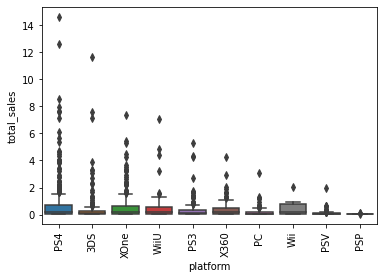

In [61]:
#изучим распределение продаж игр внутри каждой платформы за актуальный период:
ax = sns.boxplot(data=data_final, x='platform', y='total_sales', dodge=False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Лидеры за последние 5 лет: PS4, 3DS, XOne, WiiU, PS3
<br> Практически для всех платформ очевидно влияние выбросов на итоговый рейтинг: у каждой есть флагманы - нескольких игр с очень высокими продажами. Для выявления наиболее перспективных платформ необходимо оценить ситуацию с остальными играми.
<br> Платформы, где значимая часть игра имеет прордажи до 1,5 млн: PS4, XOne, WiiU, Wii. Платформы 3DS, PS3, PC показывают результат за счет флагманов продаж, основная же масса продается количеством менее 1 млн копий.
Наиболее равномерно продажи распределены внутри платформы XOne
<br> Определим, какие из платформ наиболее перспективны. Для этого изучим динамику по годам, учтем данные total_sales и распределение продаж по играм внутри платформ  

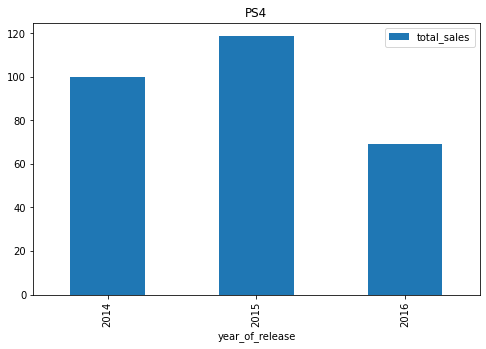

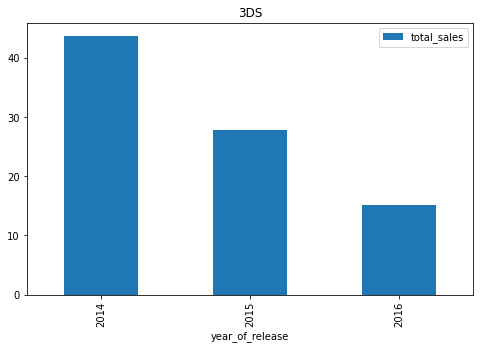

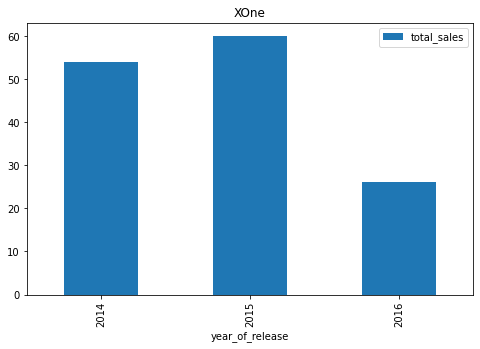

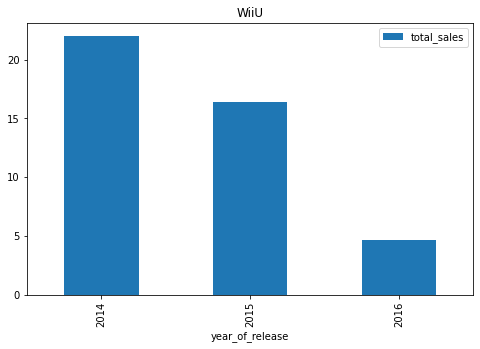

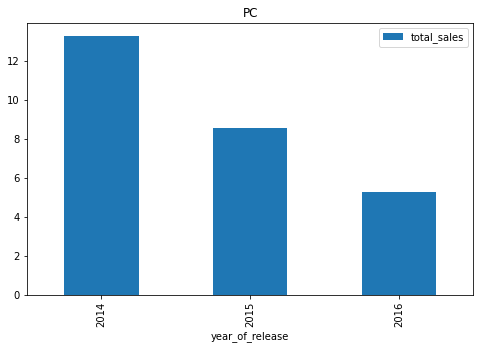

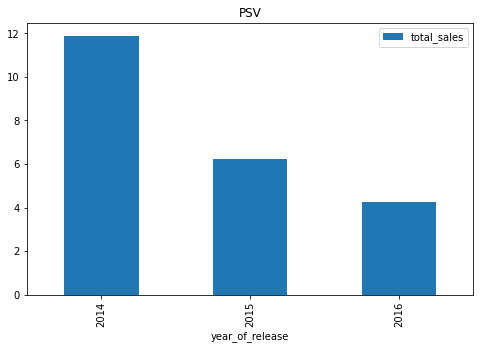

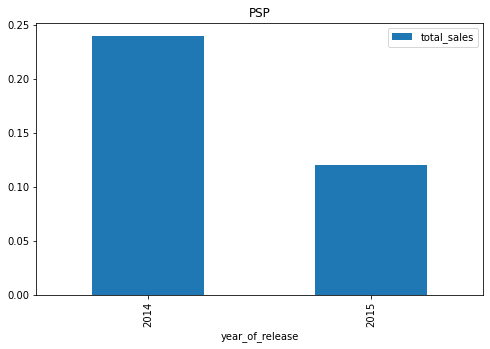

In [62]:
plts_actual = []
for el in data_final['platform'].unique().tolist():
    if el not in plts:
        plts_actual.append(el)
for el in plts_actual:
    data_final.query('platform == @el').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(title = el, kind ='bar',figsize=(8,5))
    plt.show()

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Из полученных данных можно сделать выводы, что на момент 2016 г:
    <br>Платформы PS4, XOne находятся в активной фазе жизненного цикла.
    <br> игры платформы WiiU начали продаваться хуже в 2015 г, а 2016 вероятно не показателен. Но учитывая закономерность, что активная фаза цикла у платформ около 5 лет, велика вероятность, что будет происходить угасание. 
    <br>3DS, PC, PSV, PSP, показывает отрицательую динамику. 
    <br>в 2016 г PS4, XOne также показали отрицательный рост, но известно, что данные за 2016 г могут быть неполными,
    <br> т.о. нельзя сделать вывод о падении за этот период.
    <br>Учитывая данные о распределении, объеме продаж и их динамике, можно сделать вывод, что PS4 и XOne потенциально наиболее прибыльные платформы

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1546f9fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1546fae550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1546f9faf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1546faec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1546faef70>],
 'means': []}

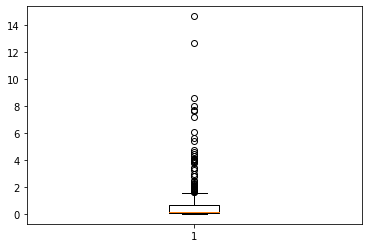

In [63]:
#рассмотрим основные показатели для платформ PS4 и XOne 
ps4 = data_final.query('platform == "PS4"')
plt.boxplot(x=ps4['total_sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1546f920a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1546f92760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1546f82d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1546f92e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1546f1d1f0>],
 'means': []}

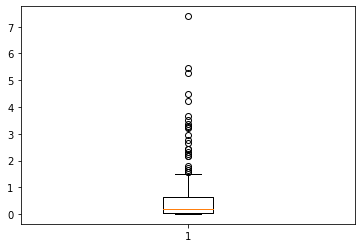

In [64]:
xone = data_final.query('platform == "XOne"')
plt.boxplot(x=xone['total_sales'])

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Для PS4 и XOne бОльшая часть значений продаж лежит в диапазоне до 2 млн копий. В значениях много выбросов, максимальные около 15 млн копий для PS4 и около 8 для XOne.

(0.0, 3.0)

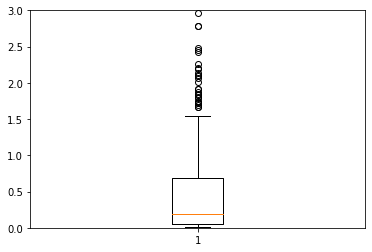

In [65]:
#Ограничим графики для более подробного изучения медианыи и квантилей
plt.boxplot(x=ps4['total_sales'])
plt.ylim(0, 3)

(0.0, 3.0)

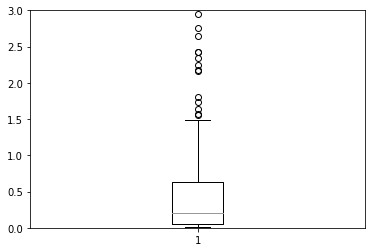

In [66]:
plt.boxplot(x=xone['total_sales'])
plt.ylim(0, 3)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 для игр обеих платформ медианное значение продаж составляет около 0,2 млн. 
    <br> верхняя граница статистически значимой выборки для обеих игр также лежит примерно в одной области: около 1,5-1,6 млн копий
    <br> Распределени по квантилям также похоже.
    <br> Можно сделать вывод, что платформа ps4 выигрывает по продажам у xone за счет выбросов: их плотность выше, максимальные значения практически в 2 раза больше

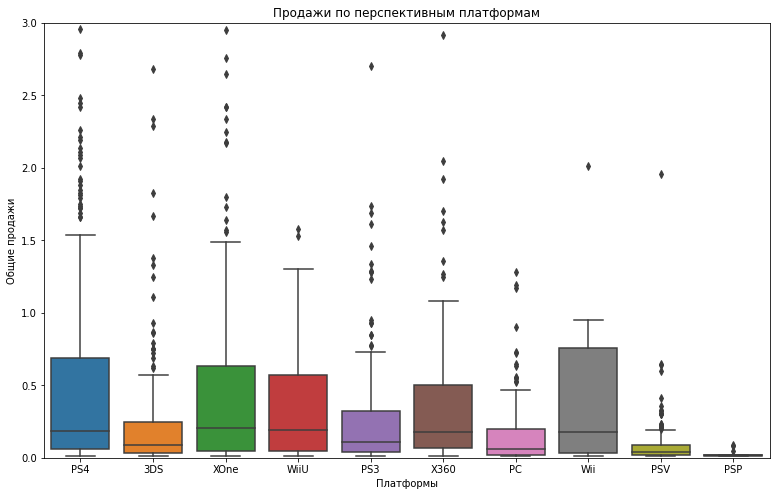

In [67]:
#Код ревьюера
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_final, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

Коэффициент корреляции: 0.33651362483599345


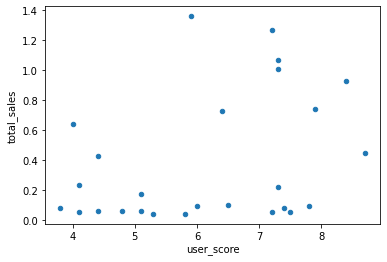

In [68]:
#изучим взаимосвязь оценок пользователей и критиков и уровня продаж на примере наиболее востребованной платформы:
X360_scatter = data_final.query('~critic_score.isnull() & platform == "X360" & user_score != 0')
X360_scatter.plot(x='user_score', y='total_sales', kind='scatter')

print('Коэффициент корреляции:', X360_scatter['user_score'].corr(X360_scatter['total_sales']))
plt.show()


Коэффициент корреляции: 0.5257228356581523


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

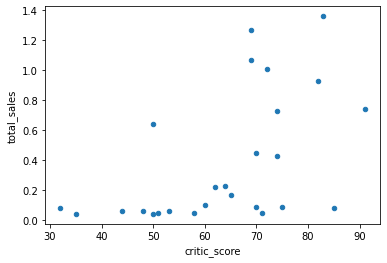

In [69]:
print('Коэффициент корреляции:', X360_scatter['critic_score'].corr(X360_scatter['total_sales']))
X360_scatter.plot(x='critic_score', y='total_sales', kind='scatter')


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Коэффициент корреляции и диграммы рассеяния говорят о слабой взаимосвязи, однако она есть.
<br> Наименьше влияние на продажи у оценок пользователей: коэффициент = 0,34
<br> чуть сильнее взаимосвязь у оценок критиков и продаж: 0,53

array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

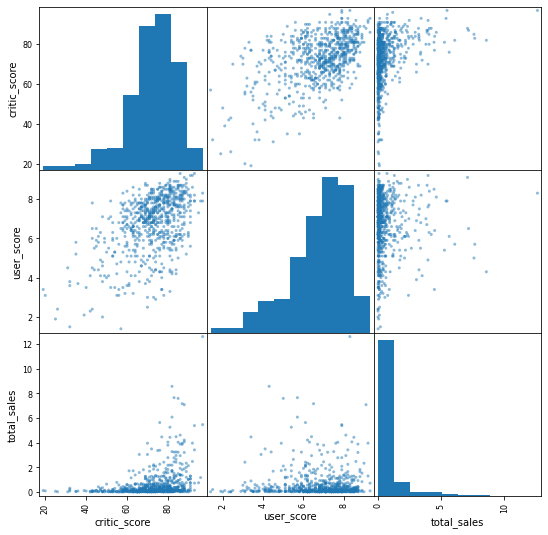

In [70]:
#Будут ли выводы актуальны и для других платформ?
data_pairplot = data_final.query('~critic_score.isnull() & user_score != 0')
data_pairplot = data_pairplot[['platform','critic_score','user_score','total_sales']]

pd.plotting.scatter_matrix(data_pairplot, figsize=(9, 9)) 

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Для показателей по всем платформам диаграмма говорит о слабом влиянии оценок критиков и пользователей на уровень продаж.
<br> Из двух категорий оценок рейтинг критиков имеет больший вес, но и он не оказывает критического влияния на уровень продаж.     

In [71]:
##изучим распределение продаж игр по жанрам:
data_genre_pivot = data_final.query('~genre.isnull()')

data_genre_pivot.pivot_table(index='genre',values='total_sales',aggfunc='sum')\
.sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


[Text(0, 0, 'Shooter'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Role-Playing'),
 Text(3, 0, 'Sports'),
 Text(4, 0, 'Fighting'),
 Text(5, 0, 'Racing'),
 Text(6, 0, 'Misc'),
 Text(7, 0, 'Platform'),
 Text(8, 0, 'Simulation'),
 Text(9, 0, 'Adventure'),
 Text(10, 0, 'Puzzle'),
 Text(11, 0, 'Strategy')]

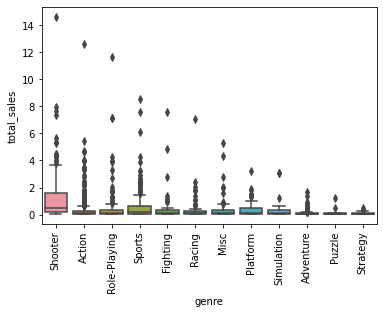

In [72]:
##изучим распределение продаж игр по жанрам за актуальный период::
ax_1 = sns.boxplot(data=data_final, x='genre', y='total_sales', dodge=False)

ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=90)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Категория Shooter лидирует как за счет выбросов, так и за счет продаж основной массы игр. В жанре Shooter наибольшая 
<br> статистически значимая выборка и наибольшее среднее на одну игру среди всех категорий.
<br> За Shooter следует Action, однако высокий рейтинг у жанра за счет количества игр и выбросов: на графике виден небольшой диапазон статистически значимых значений и несколько выбросов с очень высокими продажами.
<br> При этом среднее стремится к 0. Похожая ситуация с Role-playing.
<br> Далее следуют жанры Sports, Fighting, Racing, и категория Misc. Стоит отметить, что в жанре Sports основная масса игр имеет достаточно весомые продажи. В жанре востребованы не только флагманы продаж, но и рядовые игры. 
<br> Среди жанров с наибольшим средним по продажам, наиболее равномерно показатели распределены в жанре Sports.
    Вероятно, Shooter и Sports - это наиболее прибыльные жанры. Из них Shooter явно превосходит в продажах.

### Портрет пользователя регионов

In [73]:
#изучим подробнее данные в разрезе регионов продаж. Рассмотрим ТОП-5 платформ и жанров:

data_na_plt = data_final.groupby(['platform']).sum().sort_values(by='na_sales', ascending=False)[:5]
data_na_gr = data_final.groupby(['genre']).sum().sort_values(by='na_sales', ascending=False)[:5]

<AxesSubplot:title={'center':'Продажи в Северной Америке, топ-5 платформ, млн копий'}, ylabel='na_sales'>

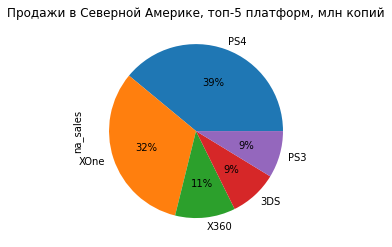

In [74]:
#какие предпочтения у пользователей в Северной Америке?

data_na_plt.plot(kind='pie', y='na_sales', autopct='%1.0f%%',
title='Продажи в Северной Америке, топ-5 платформ, млн копий', legend=False)

<AxesSubplot:title={'center':'Продажи в Северной Америке, топ-5 жанров, млн копий'}, ylabel='na_sales'>

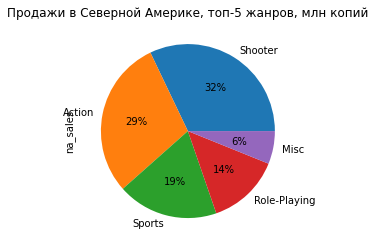

In [75]:
data_na_gr.plot(kind='pie', y='na_sales', autopct='%1.0f%%',
title='Продажи в Северной Америке, топ-5 жанров, млн копий', legend=False)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Пользователи в Северной Америке предпочитают игры на платформах PS4 (39%), XOne (32%), X360 (11%), 3DS (9%), PS3(9%)  
<br> Среди жанров наиболее востребованы Shooter (32%), далее Action и Sports (29% и 19%), Role-Playing (14%) и 6% Misc 

In [76]:
#какие предпочтения у пользователей Европы?
data_eu_plt = data_final.groupby(['platform']).sum().sort_values(by='eu_sales', ascending=False)[:5]
data_eu_gr = data_final.groupby(['genre']).sum().sort_values(by='eu_sales', ascending=False)[:5]

<AxesSubplot:title={'center':'Продажи в Европе, топ-5 платформ, млн копий'}, ylabel='eu_sales'>

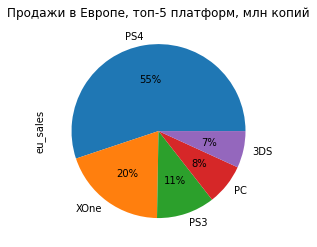

In [77]:
data_eu_plt.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
title='Продажи в Европе, топ-5 платформ, млн копий', legend=False)

<AxesSubplot:title={'center':'Продажи в Европе, топ-5 жанров, млн копий'}, ylabel='eu_sales'>

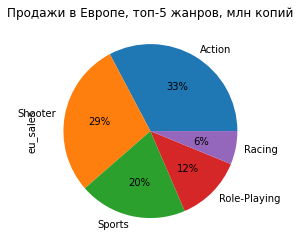

In [78]:
data_eu_gr.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
title='Продажи в Европе, топ-5 жанров, млн копий', legend=False)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Предпочтения пользователей из Европы по платформам отчасти похожи с Северной Америкой:
<br> Лидирует платформа PS4 (55%), далее XOne (20%), PS3 (11%), далее почти в равной степени PC (8%) и 3DS (7%).
<br> Среди жанров предпочтения также похожи с Северной Америкой.
<br> Топ-5 жанров в Европе: Action (33%), далее Shooter (29%), Sports (20%), Role-Playing (12%) и 6% предпочитают Racing 

In [79]:
#какие предпочтения у пользователей в Японии?

data_jp_plt = data_final.groupby(['platform']).sum().sort_values(by='jp_sales', ascending=False)[:5]
data_jp_gr = data_final.groupby(['genre']).sum().sort_values(by='jp_sales', ascending=False)[:5]

<AxesSubplot:title={'center':'Продажи в Японии, топ-5 платформ, млн копий'}, ylabel='jp_sales'>

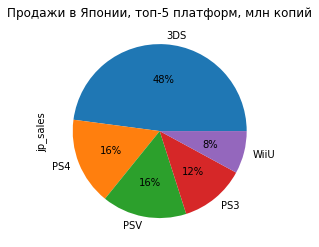

In [80]:
data_jp_plt.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',
title='Продажи в Японии, топ-5 платформ, млн копий', legend=False)

<AxesSubplot:title={'center':'Продажи в Японии, топ-5 жанров, млн копий'}, ylabel='jp_sales'>

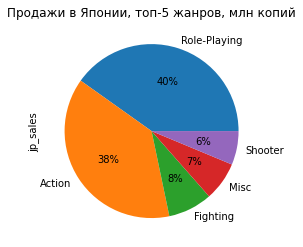

In [81]:
data_jp_gr.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',
title='Продажи в Японии, топ-5 жанров, млн копий', legend=False)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Предпочтения пользователей в Японии ожидаемо отличаются от Америки и Европы.
<br> Абсолютный лидер, платформа 3DS (48%), практически половина продаж игр на этой платформе. Далее PS4 (16%), PSV (16%), PS3 (12%) и 8% WiiU.
<br> Среди жанров в Японии лидер Role-Playing (40%), чуть меньше Action (38%), 
<br> далее пятерку замыкают Fighting (8%), Misc (7%), и Shooting (6%)

<AxesSubplot:title={'center':'Продажи в Японии, топ-5 платформ жанра Role-Playing, млн копий'}, ylabel='jp_sales'>

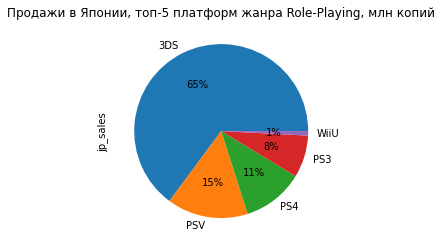

In [82]:
#Возможно платформа 3DS популярна, т к среди игр много в жанре Role-playing? Проверим:

data_jp = data_final.query('genre == "Role-Playing"')
data_jp = data_jp.groupby(['platform']).sum().sort_values(by='jp_sales', ascending=False)[:5]
data_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',
title='Продажи в Японии, топ-5 платформ жанра Role-Playing, млн копий', legend=False)

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Существенные различия между продажами платформ в Японии и Америке и Европе объяснясняются тем, 
<br> что основная часть столь любимых японцами игр Role-Playing выпускается преимущественно на платформе 3DS (65%).

In [83]:
#влияет ли рейтинг ESRB на продажи?
data_rating = data_final.pivot_table(index='rating',values=('na_sales','eu_sales','jp_sales','total_sales'),aggfunc='sum')\
.sort_values(by='total_sales',ascending=False)

data_rating

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,93.44,8.01,96.42,226.54
unknown,58.95,56.90,64.72,198.97
E,58.06,8.94,50.74,133.13
T,34.07,14.78,38.95,99.13
E10+,26.16,4.46,33.23,71.68


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Очевидно, что рейтинг ESRB влияет на продажи в Америке и Европе. Т к прослеживается одна и та же закономерность: топ 3 строчки продаж с рейтингами M, E, T. Иная ситуация с Японией: здесь преобладают игры без рейтинга ESRB. Связано с тем, что он предназначен для маркировки игр для США и Канады

### Проверка гипотез

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br> Сформулируем нулевую и альтернативную гипотезы:    
<br> H0 - средние пользовательские рейтинги платформ Xbox One и PC равны
<br> H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [84]:
data_final_st = data_final[data_final['user_score'] !=0 ]

xone = data_final_st[data_final_st['platform'] =='XOne']['user_score'].dropna()
pc = data_final_st[data_final_st['platform'] == 'PC']['user_score'].dropna()

results = st.ttest_ind(xone, pc, equal_var=False)
alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [85]:
#прорверим, выведем средние:
xone.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [86]:
pc.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.
<br> H0 - Средние пользовательские рейтинги жанров Action и Sports равны.
<br> H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

In [87]:
action = data_final_st[data_final_st['genre'] =='Action']['user_score'].dropna()
sports = data_final_st[data_final_st['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(action, sports, equal_var=True)
alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [88]:
action.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [89]:
sports.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 Если данные нулевой гипотезе не противоречат, её не отвергаем. Если же приходим к выводу, что вероятность 
<br>получить такие данные очень низка, появляется основание отбросить эту гипотезу. Задача статистического теста в том, <br>чтобы эту вероятность найти.
<br>    В первом случае нулевая гипотеза говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не опровергнута, средние равны. Выведенные для дополнительной проверки средние подтверждают правильность выводов. 
<br>    Во втором случае нулевая гипотеза говорит о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Соответственно, когда мы отвергаем нулевую гипотезу, то у нас нет оснований полагать, что средние рейтинги равны. Выведенные в проверке средние подтверждают вывод.

### Общий вывод

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
💬 По иогам исследования данных можно сделать следующие выводы:
<br>    
<br> - Игровые платформы имеют некий жизненный цикл: характерный период исчезновения старых и появления новых платформ составляет около 10 лет. Пик развития составляет около 5 лет.
<br> - Для исследования актуальных данных взят период 2014-2016 гг. При этом известно, что данные за 2016 г могут быть неполными.    
<br> - лидеры за последние 3 года: PS4, 3DS, XOne, WiiU, PS3
<br> - Практически для всех платформ очевидно влияние выбросов на итоговый рейтинг: у каждой есть флагманы - нескольких игр с очень высокими продажами.
<br> - Платформы, где основная часть игр имеет весомые продажи (до 1,5 млн): PS4, XOne, WiiU, Wii.
<br> - Платформы 3DS, PS3, PC показывают результат за счет флагманов продаж, основная же масса продается количеством менее 1 млн копий. 
<br>Платформы PS4, XOne находятся в активной фазе жизненного цикла. 3DS, PC, PSV, PSP, показывает отрицательую динамику. 
<br> - в 2016 г PS4, XOne также показали отрицательный рост, но известно, что данные за 2016 г могут быть неполными,
<br> т.о. нельзя сделать вывод о падении за этот период.
<br> - Учитывая данные о распределении, объеме продаж и их динамике, можно сделать вывод, что PS4 и XOne потенциально наиболее прибыльные платформы
<br> - Основные показатели наиболее перспективных платформ PS4 и XOne: 
    <br> для игр обеих платформ медианное значение продаж составляет около 0,2 млн. 
    <br> верхняя граница статистически значимой выборки для обеих игр также лежит примерно в одной области: около 1,6 млн копий
    <br> Распределение по квантилям также похоже.
    <br> Можно сделать вывод, что платформа ps4 выигрывает по продажам у xone за счет выбросов: их плотность выше, максимальные значения практически в 2 раза больше
    
<br>Выводы по итогам исследования продаж в разрезе платформ, жанров и регионов:
<br>    
<br> - Категория Shooter лидирует как за счет выбросов, так и за счет продаж основной массы игр. В жанре Shooter наибольшая 
<br> статистически значимая выборка и наибольшее среднее на одну игру среди всех категорий.
<br> - За Shooter следует Action, однако высокий рейтинг у жанра за счет количества игр и выбросов, при этом средние продажи небольшие, менее 0,5 млн копий. Похожая ситуация с Role-playing.
<br> - Далее следуют жанры Sports, Fighting, Racing, и категория Misc. Стоит отметить, что в жанре Sports основная масса игр имеет достаточно весомые продажи. В жанре востребованы не только флагманы продаж, но и рядовые игры. 
<br> - Среди жанров с наибольшим средним по продажам, наиболее равномерно показатели распределены в жанре Sports.
<br> - Вероятно, Shooter и Sports - это наиболее прибыльные жанры. Из них Shooter явно превосходит в продажах. 
<br>   
<br> - Пользователи в Северной Америке предпочитают игры на платформах PS4 (39%), XOne (32%), X360 (11%), 3DS (9%), PS3(9%)  
<br> - Среди жанров у пользователей из Америки наиболее востребованы Shooter (32%), далее Action и Sports (29% и 19%), Role-Playing (14%) и 6% Misc 
<br>    
<br> - Предпочтения пользователей из Европы по платформам отчасти похожи с Северной Америкой:
<br> Лидирует платформа PS4 (55%), далее XOne (20%), PS3 (11%), далее почти в равной степени PC (8%) и 3DS (7%).
<br> - Среди жанров предпочтения также похожи с Северной Америкой.
<br> Топ-5 жанров в Европе: Action (33%), далее Shooter (29%), Sports (20%), Role-Playing (12%) и 6% предпочитают Racing 
<br>
<br> - Предпочтения пользователей в Японии ожидаемо отличаются от Америки и Европы.
<br> Абсолютный лидер, платформа 3DS (48%), практически половина продаж игр на этой платформе. Далее PS4 (16%), PSV (16%), PS3 (12%) и 8% WiiU.
<br> - Среди жанров в Японии лидер Role-Playing (40%), чуть меньше Action (38%), далее пятерку замыкают Fighting (8%), Misc (7%), и Shooting (6%)
<br> - Существенные различия между продажами платформ в Японии и Америке и Европе объяснясняются тем, 
<br> что основная часть столь любимых японцами игр Role-Playing выпускается преимущественно на платформе 3DS (65%).
<br>
<br>Прочие выводы:
    <br>- Изучена взаимосвязь оценок пользователей и критиков и показателя продаж: оценки критиков и пользователей имеют слабое влияние на продажи. Из двух категорий оценок рейтинг критиков имеет больший вес, но и он не оказывает критического влияния на уровень продаж.     
    <br>-  Очевидно, что рейтинг ESRB влияет на продажи в Америке и Европе. Т к прослеживается одна и та же закономерность: топ 3 строчки продаж с рейтингами - это M, E, T. Иная ситуация с Японией: здесь преобладают игры без рейтинга ESRB. Связано с тем, что он предназначен для маркировки игр для США и Канады
    <br>- Проверены гипотезы о том, что:
        <br>средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтвердилась.
        <br>средние пользовательские рейтинги жанров Action и Sports разные. Средние рейтинги действительно разные. Гипотеза верна.
    <br> 